In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('survey.csv')

In [70]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [72]:
# Converting 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Handling missing values
# For 'state', fill with 'Not Applicable'
df['state'].fillna('Not Applicable', inplace=True)

# For 'work_interfere', 'self_employed', fill with 'Unknown'
df['work_interfere'].fillna('Unknown', inplace=True)
df['self_employed'].fillna('Unknown', inplace=True)

# Checking the results
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,Unknown,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,Unknown,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,Not Applicable,Unknown,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,Not Applicable,Unknown,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,Unknown,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [73]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   state                      1259 non-null   object        
 5   self_employed              1259 non-null   object        
 6   family_history             1259 non-null   object        
 7   treatment                  1259 non-null   object        
 8   work_interfere             1259 non-null   object        
 9   no_employees               1259 non-null   object        
 10  remote_work                1259 non-null   object        
 11  tech_company               1259 non-null   object        
 12  benefi

In [75]:
df.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          46
self_employed                   3
family_history                  2
treatment                       2
work_interfere                  5
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [76]:
# Preprocessing the 'age' column

# Replacing outlier ages with the median age
median_age = df[(df['Age'] >= 18) & (df['Age'] <= 75)]['Age'].median()
df.loc[(df['Age'] < 18) | (df['Age'] > 75), 'Age'] = median_age

# Bucketizing the age into 5 different age brackets
age_bins = [0, 24, 34, 44, 54, 200]  # 200 is used as an upper bound for ages above 54
age_labels = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Preprocessing the 'gender' column

# Standardization mapping for gender
gender_mapping = {
    'Female': ['Female', 'female', 'Cis Female', 'F', 'f', 'Woman', 'woman', 'Femake', 'Female ', 'Female (trans)', 'Female (cis)', 'femail'],
    'Male': ['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ', 'Man', 'msle', 'cis male', 'Mail', 'Malr', 'Cis Man', 'ostensibly male, unsure what that really means'],
    'Other': ['Trans-female', 'something kinda male?', 'queer/she/they', 'non-binary', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender', 'cis-female/femme', 'Neuter', 'Trans woman', 'queer', 'A little about you', 'p']
}

# Applying the mapping
for gen in gender_mapping:
    df['Gender'].replace(gender_mapping[gen], gen, inplace=True)

# Handling any remaining unclassified genders as 'Other'
df.loc[~df['Gender'].isin(['Male', 'Female']), 'Gender'] = 'Other'

# Checking the results
df[['Age', 'Age Group', 'Gender']].head()


,Age,Age Group,Gender
0,37,35-44,Female
1,44,45-54,Male
2,32,25-34,Male
3,31,25-34,Male
4,31,25-34,Male


In [78]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.head())


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age Group
0,2014-08-27 11:29:31,37,Female,United States,IL,Unknown,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,35-44
1,2014-08-27 11:29:37,44,Male,United States,IN,Unknown,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,45-54
2,2014-08-27 11:29:44,32,Male,Canada,Not Applicable,Unknown,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,25-34
3,2014-08-27 11:29:46,31,Male,United Kingdom,Not Applicable,Unknown,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,25-34
4,2014-08-27 11:30:22,31,Male,United States,TX,Unknown,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,25-34


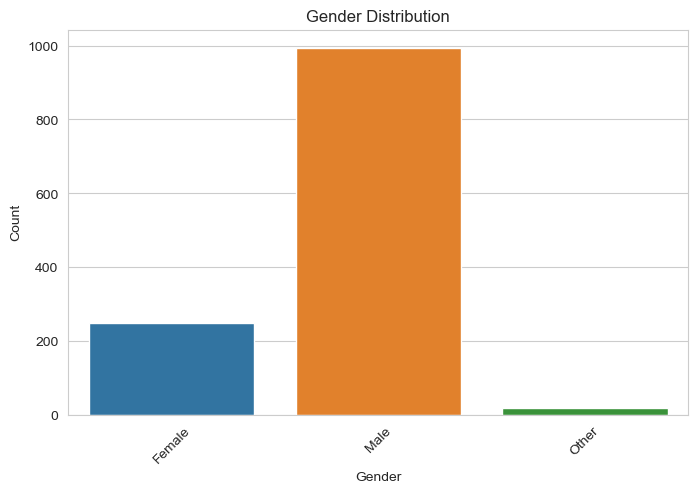

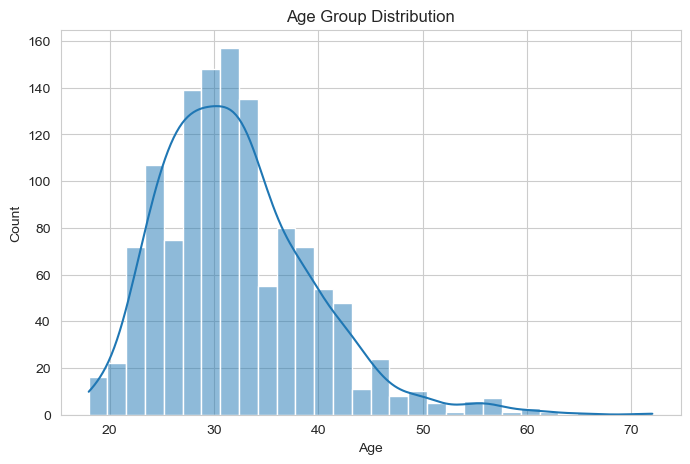

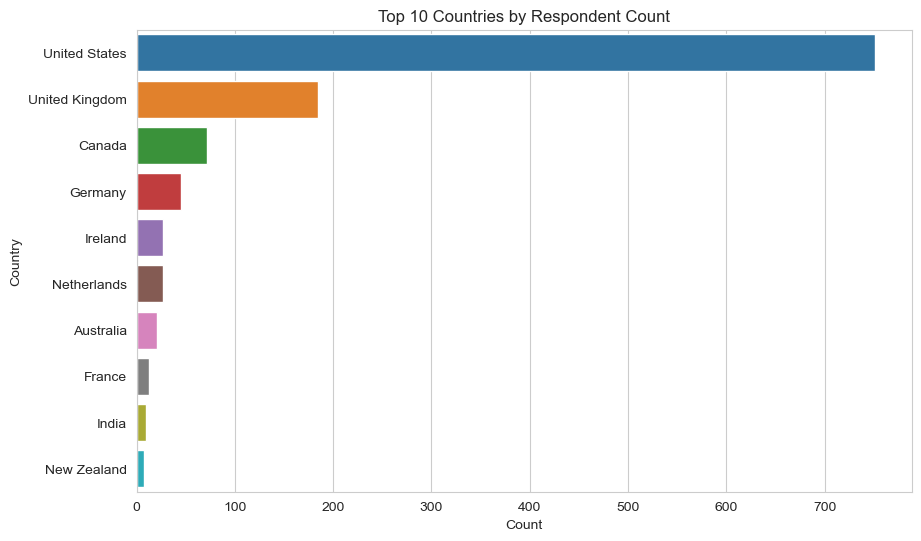

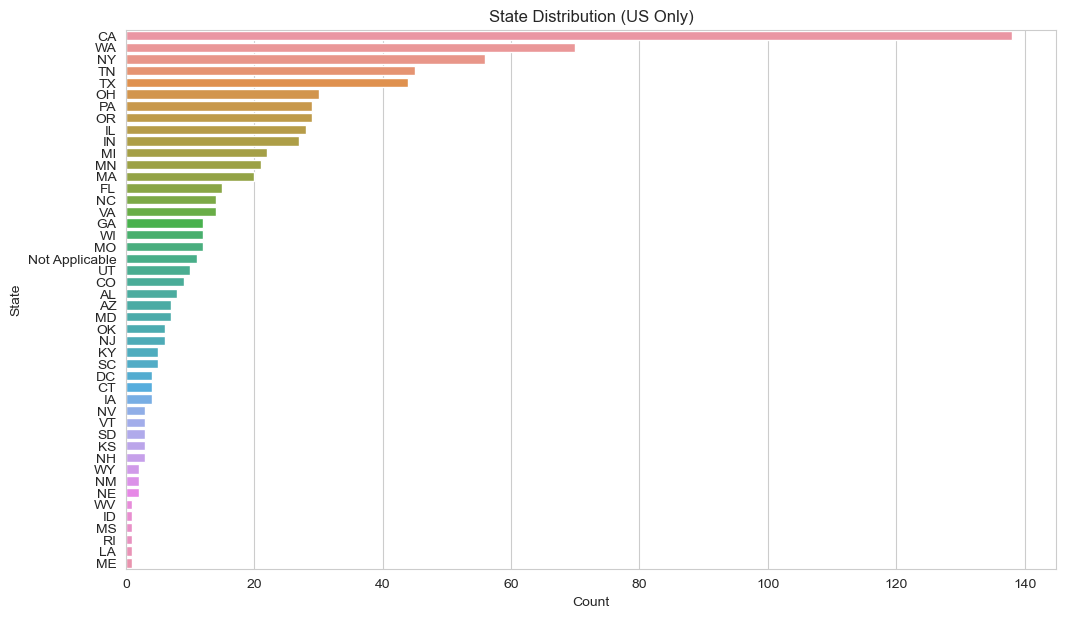

In [81]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating visualizations

# 1. Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Age Group Distributions
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Group Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 3. Country Distribution
plt.figure(figsize=(10, 6))
country_counts = df['Country'].value_counts()
sns.barplot(x=country_counts[:10], y=country_counts.index[:10])  # Top 10 countries
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# 4. State Distribution (for the United States only)
plt.figure(figsize=(12, 7))
state_counts = df[df['Country'] == 'United States']['state'].value_counts()
sns.barplot(x=state_counts, y=state_counts.index)
plt.title('State Distribution (US Only)')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

# These plots provide a basic overview of the demographics in the dataset.


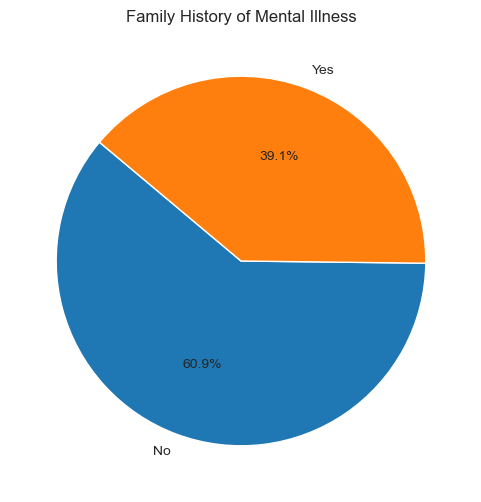

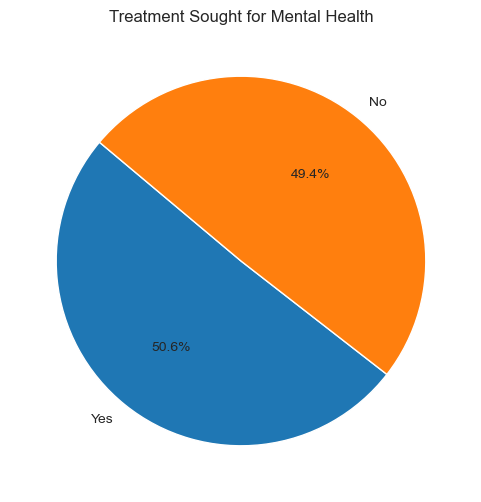

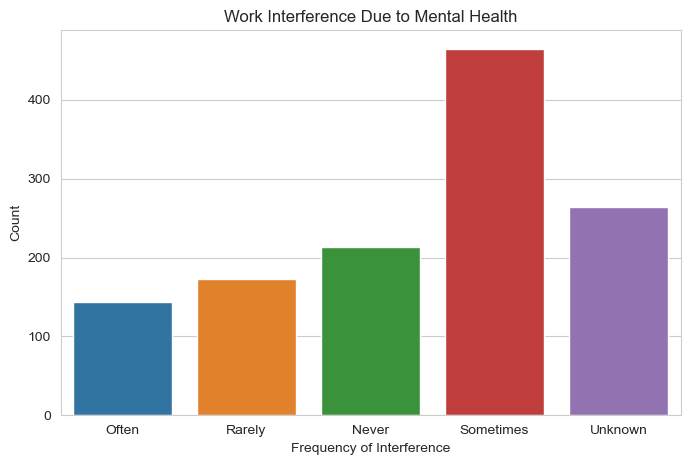

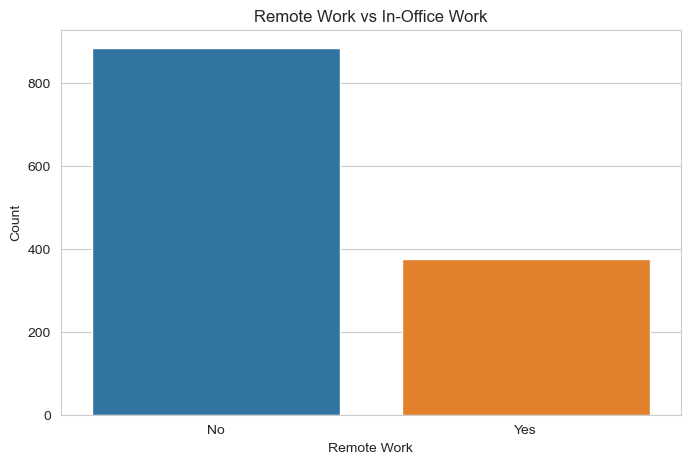

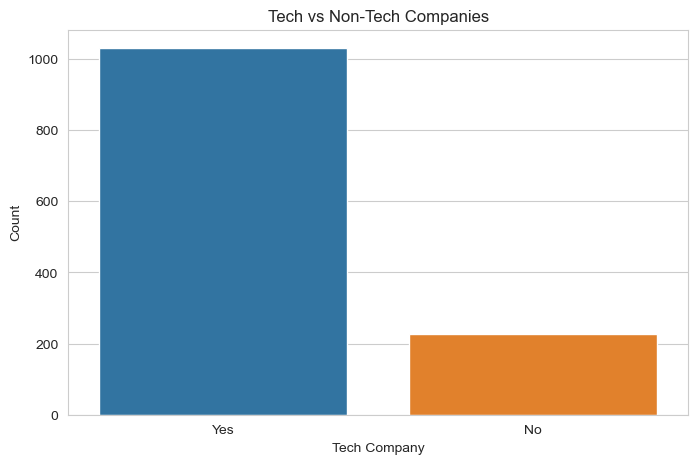

In [85]:
# 5. Proportion of People with Family History of Mental Illness
plt.figure(figsize=(6, 6))
family_history_counts = df['family_history'].value_counts()
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Family History of Mental Illness')
plt.show()

# 6. Treatment Sought
plt.figure(figsize=(6, 6))
treatment_counts = df['treatment'].value_counts()
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Treatment Sought for Mental Health')
plt.show()

# 7. Work Interference Due to Mental Health
plt.figure(figsize=(8, 5))
sns.countplot(x='work_interfere', data=df)
plt.title('Work Interference Due to Mental Health')
plt.xlabel('Frequency of Interference')
plt.ylabel('Count')
plt.show()

# 8. Remote Work and Mental Health
plt.figure(figsize=(8, 5))
sns.countplot(x='remote_work', data=df)
plt.title('Remote Work vs In-Office Work')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

# 9. Tech Company Employees vs. Mental Health
plt.figure(figsize=(8, 5))
sns.countplot(x='tech_company', data=df)
plt.title('Tech vs Non-Tech Companies')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.show()
